In [12]:
from lexicalrichness import LexicalRichness
import pandas as pd 
import numpy as np

In [13]:
df = pd.read_csv('the_rest_data.zip')
df = df[df['Poll Responses Response'].notnull()]

## Prep data for generating lexical richness scores

In [41]:
df['lex_data_prep']= df['stemmed_responses'].str.split(',').replace("'", '').str.join(' ')
df['lex_data_prep'] = df['stemmed_responses'].apply(" ".join)

df['lex_data_prep'] = df['stemmed_responses'].str.strip('[').str.strip(']').str.split(',').str.join(' ').str.replace("'", '')
df['lex_data_prep'].head()

0    the  strength  of  plato  approach  is  his  c...
1    in  the  breakout  we  discuss  if  outsid  th...
2    back  to  cmmon  confus  time  the  section  u...
3    most  difficult  weak  is  that  his  posit  w...
4    "im"  still  tri  to  understand  the  signifi...
Name: lex_data_prep, dtype: object

## Data cleaning 

In [42]:
#clean This student was present, but did not complete the poll.
df = df[df['Poll Responses Response'] != 'This student was present, but did not complete the poll.']

#clean up extremely short sentences
df = df[df['string'].str.len() >= 10]

In [44]:
#not yet put in lex.Dugast, lex.msttr(segment_window=0), lex.mattr(window_size=0),lex.hdd(draws=0),
def generate_words(text):
    lex = LexicalRichness(text)
    return lex.words
df['words_count'] = df['lex_data_prep'].apply(generate_words)

In [46]:
df = df[df['words_count'] > 1]

## Generate lexcial richness

In [48]:
#Generate most of lexcial richness scores
def generate_lexcial_richness(text):
    lex = LexicalRichness(text)
    return lex.terms, lex.ttr, lex.rttr, lex.cttr, lex.mtld(threshold=0.72),  lex.Herdan,  lex.Maas

df['unique_words'], df['ttr'], df['rttr'], df['cttr'], df['mtld'], df['herdan'], df['maas']= zip(*df['lex_data_prep'].apply(generate_lexcial_richness))

In [49]:
def generate_dugast(text):
    lex = LexicalRichness(text)
    try:
        return lex.Dugast
    except:
        return False

df['Dugast'] = df['lex_data_prep'].apply(generate_dugast)

In [54]:
print(f'False data proportion in the dataset: ', len(df[df['Dugast'] == False])/len(df))

False data proportion in the dataset:  0.004706673390485796


In [56]:
def generate_summer(text):
    lex = LexicalRichness(text)
    try:
        return lex.Summer
    except:
        return False

df['Summer'] = df['lex_data_prep'].apply(generate_summer)

In [57]:
print(f'False data proportion in the dataset: ', len(df[df['Summer'] == False])/len(df))

False data proportion in the dataset:  0.0


count    178470.000000
mean          0.935562
std           0.036510
min          -3.897091
25%           0.926977
50%           0.939773
75%           0.950311
max           1.000000
Name: Summer, dtype: float64

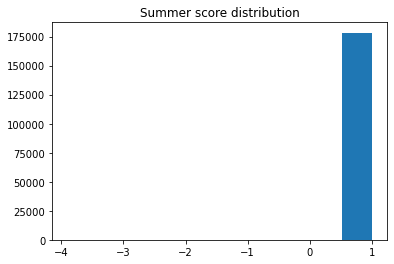

In [59]:
import matplotlib.pyplot as plt
plt.hist(df['Summer'])
plt.title('Summer score distribution')

df['Summer'].describe()

In [61]:
def generate_hdd(text):
    lex = LexicalRichness(text)
    try:
        return lex.hdd(draws=20)
    except:
        return False

df['hdd'] = df['lex_data_prep'].apply(generate_hdd)

False data proportion in the dataset:  0.012539922676080013


Text(0.5, 1.0, 'HDD score distribution')

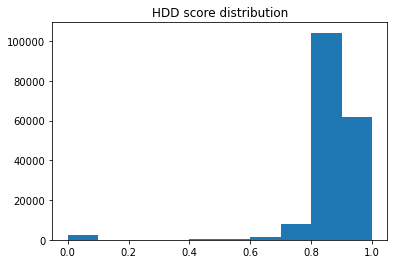

In [63]:
print(f'False data proportion in the dataset: ', len(df[df['hdd'] == False])/len(df))
plt.hist(df['hdd'])
plt.title('HDD score distribution')

In [65]:
len(df[(df.Dugast == False) | (df.Summer == False) | (df.hdd == False)])/len(df)

0.013049812293382642

In [66]:
df = df[df.Dugast != False]
df = df[df.Summer != False]
df = df[df.hdd != False]

In [67]:
#covert into a csv
compression_opts = dict(method='zip',
                        archive_name='lexcial_rich_data.csv')  
df.to_csv('lexcial_rich_data.zip', index=False,
          compression=compression_opts)  